# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot: title={'center': 'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

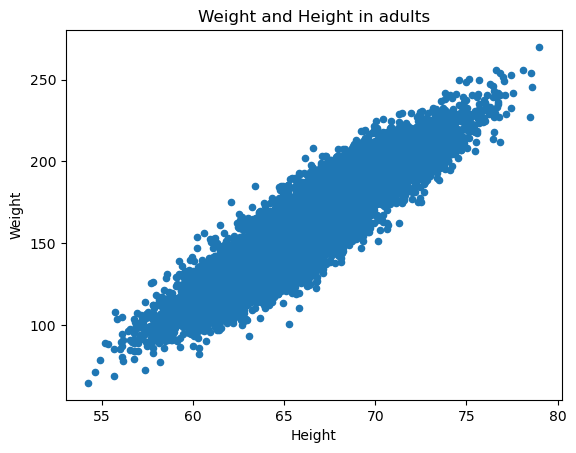

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

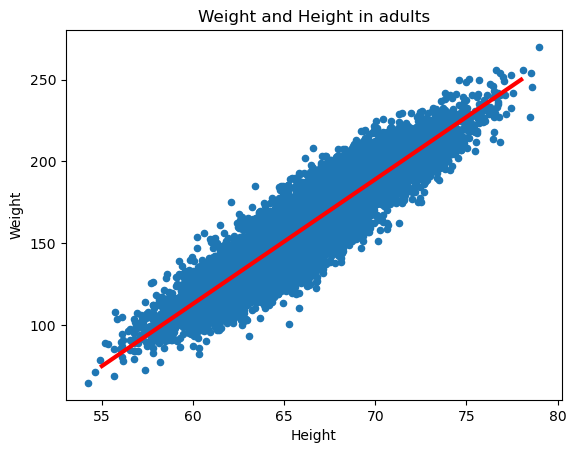

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

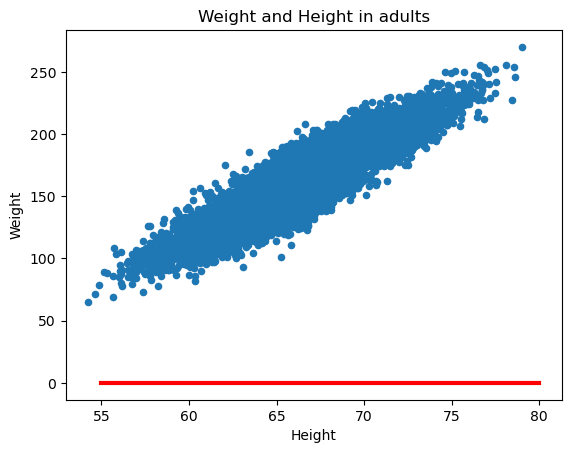

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

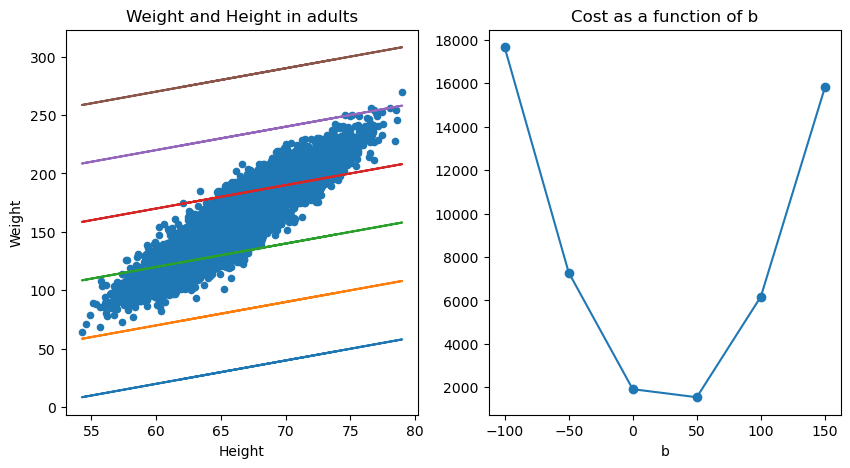

In [18]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

2023-02-14 12:00:21.982911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
model = Sequential()

2023-02-14 12:00:24.022300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.add(Dense(1, input_shape=(1,)))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [24]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 0s 482us/step - loss: 1050.0884
Epoch 2/40
313/313 [==============================] - 0s 458us/step - loss: 552.1288
Epoch 3/40
313/313 [==============================] - 0s 638us/step - loss: 521.2202
Epoch 4/40
313/313 [==============================] - 0s 459us/step - loss: 481.6466
Epoch 5/40
313/313 [==============================] - 0s 455us/step - loss: 452.9826
Epoch 6/40
313/313 [==============================] - 0s 569us/step - loss: 404.1311
Epoch 7/40
313/313 [==============================] - 0s 759us/step - loss: 358.8390
Epoch 8/40
313/313 [==============================] - 0s 502us/step - loss: 325.4355
Epoch 9/40
313/313 [==============================] - 0s 456us/step - loss: 306.2275
Epoch 10/40
313/313 [==============================] - 0s 592us/step - loss: 268.2004
Epoch 11/40
313/313 [==============================] - 0s 490us/step - loss: 253.8845
Epoch 12/40
313/313 [==============================] - 0s 489u

In [25]:
y_pred = model.predict(X)

313/313 [==============================] - 0s 366us/step


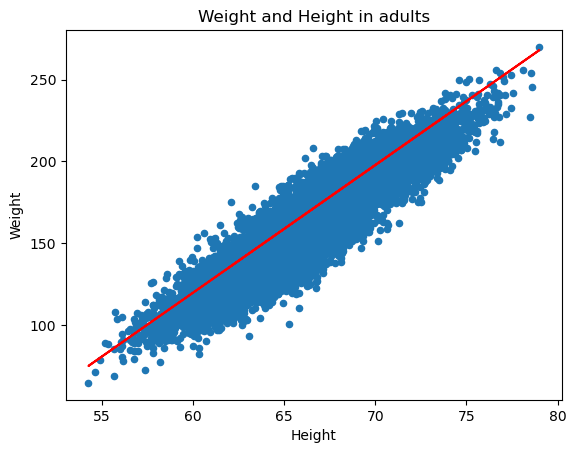

In [26]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [27]:
W, B = model.get_weights()

In [28]:
W

array([[7.800166]], dtype=float32)

In [29]:
B

array([-348.18036], dtype=float32)

## Evaluating Model Performance

In [30]:
from sklearn.metrics import r2_score

In [31]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.792


### Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [34]:
len(X_train)

8000

In [35]:
len(X_test)

2000

In [36]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [37]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [38]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

63/63 [==============================] - 0s 386us/step


In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	162.2
The Mean Squared Error on the Test set is:	166.7


In [41]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.843
The R2 score on the Test set is:	0.838


# Classification

In [42]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [43]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


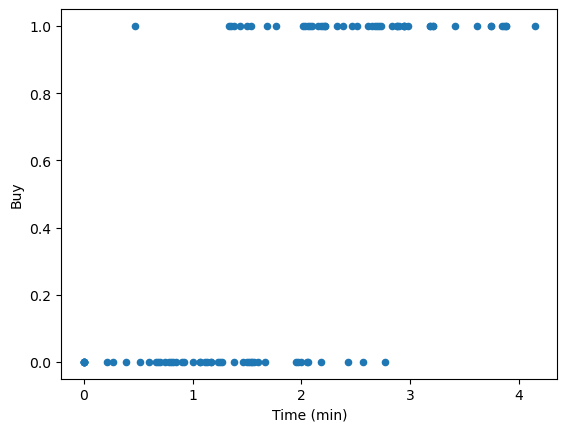

In [44]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [45]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [46]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.5800
Epoch 2/25
4/4 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7000
Epoch 3/25
4/4 [==============================] - 0s 1ms/step - loss: 0.5205 - accuracy: 0.7500
Epoch 4/25
4/4 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.7500
Epoch 5/25
4/4 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.7800
Epoch 6/25
4/4 [==============================] - 0s 917us/step - loss: 0.4808 - accuracy: 0.8000
Epoch 7/25
4/4 [==============================] - 0s 889us/step - loss: 0.4795 - accuracy: 0.8000
Epoch 8/25
4/4 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8100
Epoch 9/25
4/4 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7800
Epoch 10/25
4/4 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7800
Epoch 11/25
4/4 [==================

2/2 [==============================] - 0s 2ms/step


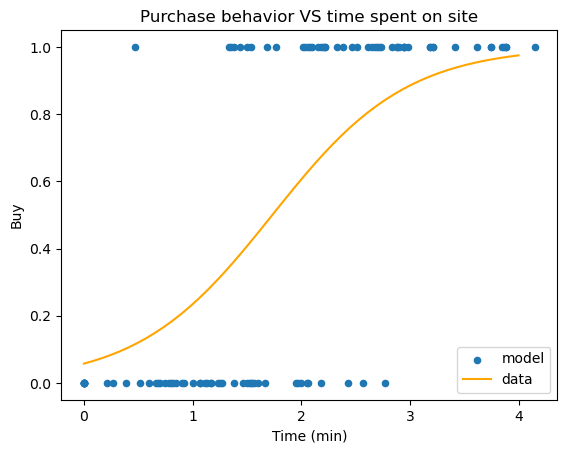

In [49]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [50]:
temp_class = model.predict(temp) > 0.5

2/2 [==============================] - 0s 2ms/step


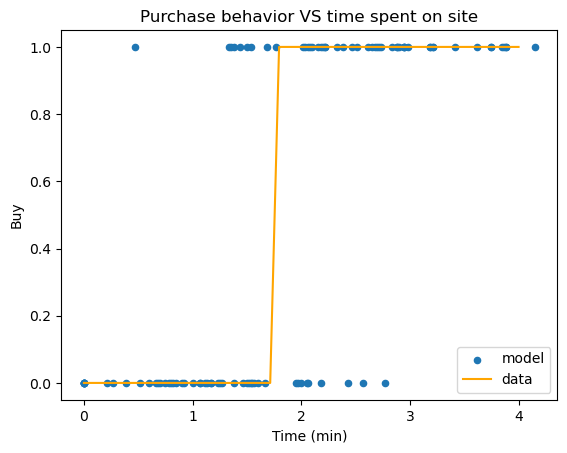

In [51]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [52]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

4/4 [==============================] - 0s 806us/step


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [57]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

4/4 [==============================] - 0s 781us/step
The accuracy score is 0.500


In [58]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [59]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

3/3 [==============================] - 0s 850us/step
The train accuracy score is 0.812
1/1 [==============================] - 0s 18ms/step
The test accuracy score is 0.750


## Cross Validation

In [60]:
from keras.wrappers.scikit_learn import KerasClassifier

In [61]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [62]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

/var/folders/hv/h89z1r9d5bsfhgw71qr03sm80000gn/T/ipykernel_45620/1282849558.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_logistic_regression_model,


In [63]:
from sklearn.model_selection import cross_val_score, KFold

In [64]:
cv = KFold(3, shuffle=True)

In [65]:
scores = cross_val_score(model, X, y, cv=cv)

In [66]:
scores

array([0.70588237, 0.72727275, 0.87878788])

In [67]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7706 ± 0.0770


## Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 8, 42]])

In [70]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [71]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,8,42


In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision:	0.824
Recall:  	0.840
F1 Score:	0.832


In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.82      0.84      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [76]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [77]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [78]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [79]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [80]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [81]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [82]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


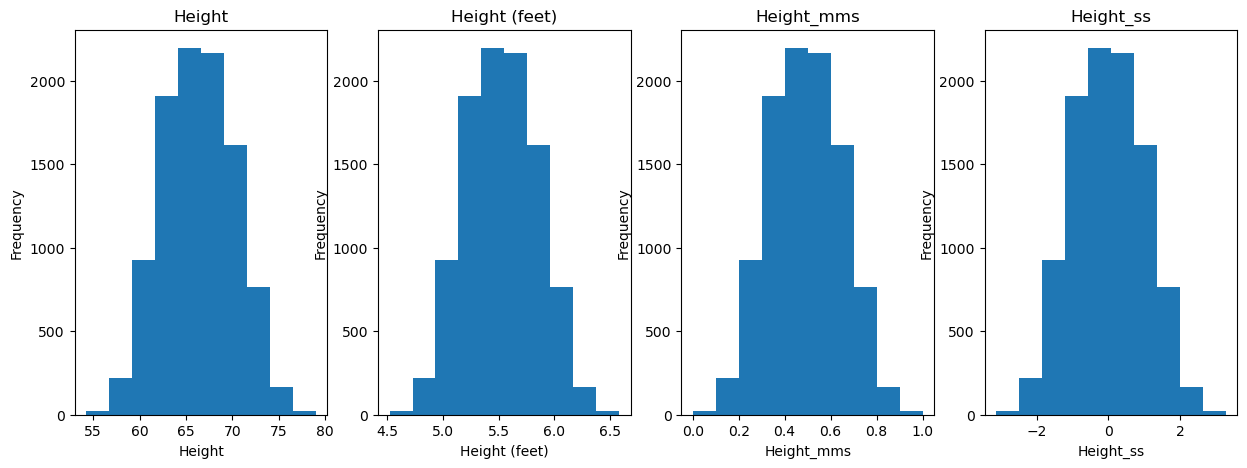

In [83]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df = pd.read_csv('../data/housing-data.csv')

array([[<AxesSubplot: title={'center': 'sqft'}>,
        <AxesSubplot: title={'center': 'bdrms'}>],
       [<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

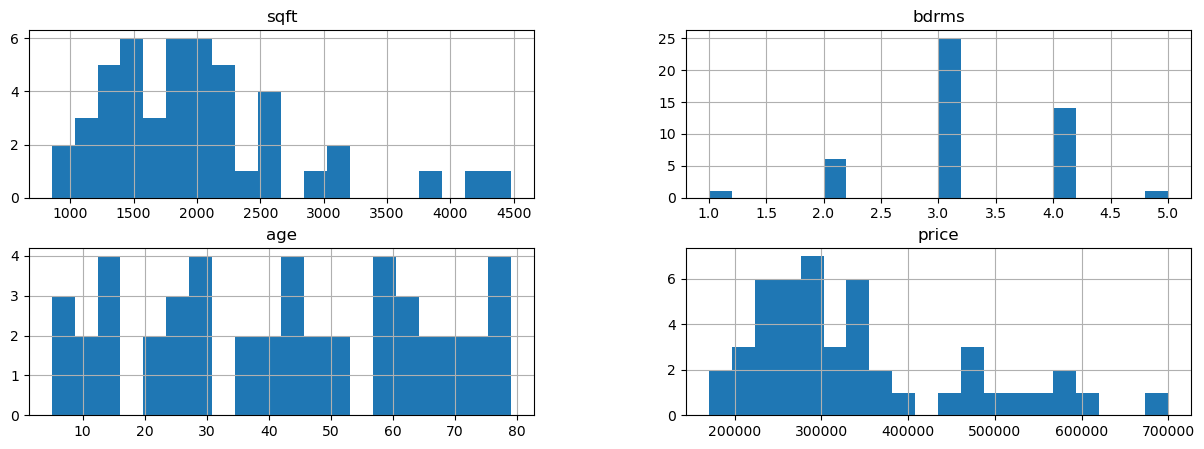

In [88]:
df.hist(bins=20, figsize=(15,5))

In [89]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [90]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [91]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

/opt/anaconda3/envs/pier/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 139153981440.0000
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 136569233408.0000
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 134102499328.0000
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 131522912256.0000
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 129196294144.0000
Epoch 6/10
2/2 [==============================] - 0s 3ms/step - loss: 126728093696.0000
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 124242083840.0000
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 121870180352.0000
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 119479025664.0000
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 117033828352.0000


In [94]:
from sklearn.metrics import r2_score

In [95]:
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

1/1 [==============================] - 0s 17ms/step


In [96]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	-5.981
The R2 score on the Test set is:	-7.829


In [97]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
y_norm = scaler.fit_transform(y.reshape(-1, 1))

In [99]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.2), 'mean_squared_error')

/opt/anaconda3/envs/pier/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2)

In [101]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 2ms/step - loss: 1.5159
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 0.9473
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 0.6587
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3817
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3095
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3993
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.5041
Epoch 8/20
2/2 [==============================] - 0s 1ms/step - loss: 0.5333
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.5093
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4861
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4594
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.4045
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

In [102]:
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [103]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_pred_train)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))

The R2 score on the Train set is:	0.725
The R2 score on the Test set is:	0.392


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [104]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [105]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [107]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>,
        <AxesSubplot: title={'center': 'number_project'}>],
       [<AxesSubplot: title={'center': 'average_montly_hours'}>,
        <AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'Work_accident'}>],
       [<AxesSubplot: title={'center': 'left'}>,
        <AxesSubplot: title={'center': 'promotion_last_5years'}>,
        <AxesSubplot: >]], dtype=object)

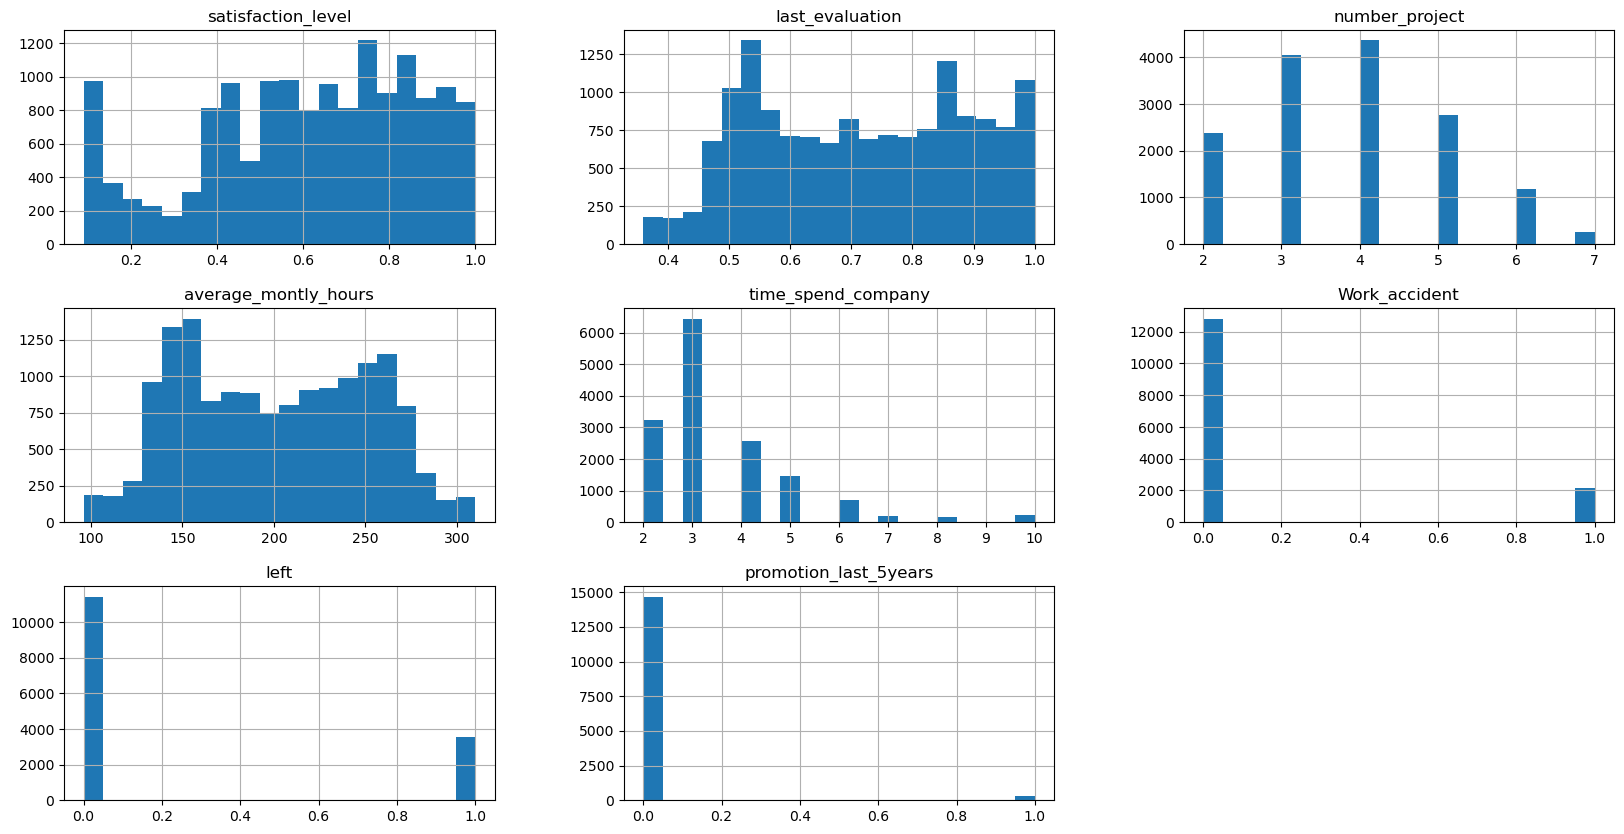

In [108]:
df.hist(bins=20, figsize=(20,10))

In [109]:
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [110]:
# Convert the categorical variables into dummy variables
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [111]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [112]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [113]:
X = pd.concat([df.drop(['sales', 'salary', 'left'], axis=1), df_dummies], axis=1).values
y = df['left'].values

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [115]:
X.shape

(14999, 20)

In [116]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/pier/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
375/375 [==============================] - 0s 569us/step - loss: 1.9750 - accuracy: 0.7215
Epoch 2/20
375/375 [==============================] - 0s 590us/step - loss: 0.5052 - accuracy: 0.7616
Epoch 3/20
375/375 [==============================] - 0s 680us/step - loss: 0.5353 - accuracy: 0.7584
Epoch 4/20
375/375 [==============================] - 0s 819us/step - loss: 0.5207 - accuracy: 0.7648
Epoch 5/20
375/375 [==============================] - 0s 841us/step - loss: 0.5324 - accuracy: 0.7639
Epoch 6/20
375/375 [==============================] - 0s 550us/step - loss: 0.5615 - accuracy: 0.7539
Epoch 7/20
375/375 [==============================] - 0s 560us/step - loss: 0.5611 - accuracy: 0.7573
Epoch 8/20
375/375 [==============================] - 0s 679us/step - loss: 0.5284 - accuracy: 0.7690
Epoch 9/20
375/375 [==============================] - 0s 604us/step - loss: 0.5281 - accuracy: 0.7653
Epoch 10/20
375/375 [==============================] - 0s 624us/step - loss: 0.551

In [119]:
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

94/94 [==============================] - 0s 407us/step


In [120]:
from sklearn.metrics import confusion_matrix, classification_report


In [121]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [122]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2306,0
Leave,694,0


In [123]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2306
           1       0.00      0.00      0.00       694

    accuracy                           0.77      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.59      0.77      0.67      3000



/opt/anaconda3/envs/pier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/pier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/pier/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
# check if you still get the same results if you use a 5-Fold cross validation on all the data
from keras.wrappers.scikit_learn import KerasClassifier

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=20, verbose=0)

/var/folders/hv/h89z1r9d5bsfhgw71qr03sm80000gn/T/ipykernel_45620/742244767.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_logistic_regression_model,


## K-Fold Validation

In [125]:
from sklearn.model_selection import KFold, cross_val_score

In [126]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7500 ± 0.0491


In [127]:
scores

array([0.77999997, 0.7923333 , 0.65600002, 0.74900001, 0.77259088])